In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# setting parameters for graphs
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (25,15),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

In [6]:
data = pd.read_csv('All_station.csv', parse_dates=[3,4])
data.drop(['Unnamed: 0', 'Unnamed: 0.1' ], axis=1, inplace=True)
#data.astype({'operation_st_esr':'int64', 'car_number':'int64'}).dtypes
data.operation_st_esr = data.operation_st_esr.astype(int)
data.car_number=data.car_number.astype(int)
data.head()

,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration
0,830003,24579856,2020-07-28 17:12:00,2020-07-29 06:02:00,12.833333,0.000000,12.833333
1,830003,24579856,2020-07-26 18:38:00,2020-07-27 21:47:00,27.150000,0.000000,27.150000
2,830003,24622276,2020-07-15 23:32:00,2020-07-17 04:27:00,15.200000,13.716667,28.916667
3,830003,28034288,2020-07-25 00:21:00,2020-07-28 05:40:00,16.766667,60.550000,77.316667
4,830003,29019288,2020-07-24 20:51:00,2020-07-28 02:00:00,77.150000,0.000000,77.150000


In [7]:
data.size


2456398

In [8]:
stantion_stat=data.operation_st_esr.value_counts()

In [9]:
stantion_stat.quantile(q=[0.05,0.25,0.5,0.75,0.95])

0.05       2.00
0.25      20.00
0.50      96.00
0.75     394.25
0.95    2368.40
Name: operation_st_esr, dtype: float64

In [10]:
stantion_stat.quantile(q=[0.33,0.66,0.95])

0.33      36.87
0.66     251.96
0.95    2368.40
Name: operation_st_esr, dtype: float64

In [11]:
stantion_stat

985906    30026
967600    19332
985609     8945
980003     7959
937906     7740
          ...  
876401        1
845009        1
881908        1
962908        1
834606        1
Name: operation_st_esr, Length: 640, dtype: int64

In [12]:
def grouping(val):
    if val < 40.0 : return 2
    elif val < 250.0 : return 1
    else: return 0

stant_gr = dict()
for i in stantion_stat.index:
    stant_gr[i] = grouping(stantion_stat[i])

data['st_group'] = data.operation_st_esr.apply(lambda x: stant_gr[x])

In [13]:
data.head()

,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,st_group
0,830003,24579856,2020-07-28 17:12:00,2020-07-29 06:02:00,12.833333,0.000000,12.833333,1
1,830003,24579856,2020-07-26 18:38:00,2020-07-27 21:47:00,27.150000,0.000000,27.150000,1
2,830003,24622276,2020-07-15 23:32:00,2020-07-17 04:27:00,15.200000,13.716667,28.916667,1
3,830003,28034288,2020-07-25 00:21:00,2020-07-28 05:40:00,16.766667,60.550000,77.316667,1
4,830003,29019288,2020-07-24 20:51:00,2020-07-28 02:00:00,77.150000,0.000000,77.150000,1


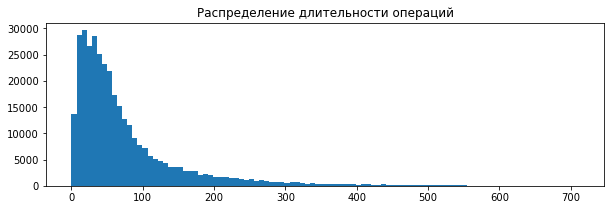

In [14]:
plt.figure(figsize=(10,3))
plt.hist(data.duration,bins=100,histtype='stepfilled') #,label='medium')
#plt.legend(loc='best');
plt.title('Распределение длительноcти операций');

Text(0, 0.5, '')

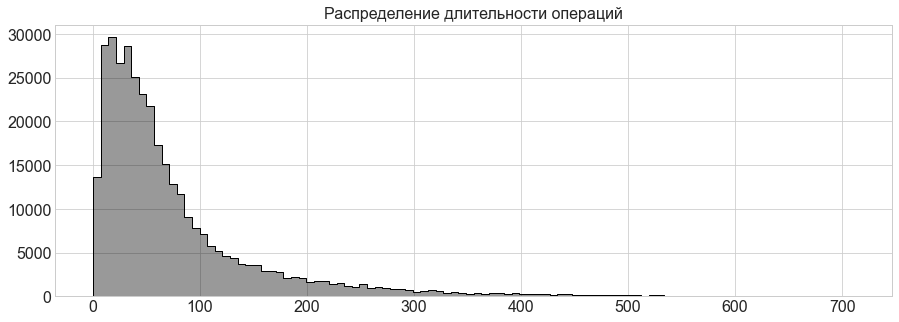

In [69]:
plt.figure(figsize=(15,5))
sns.histplot(data.duration, bins=100, element="step",  color='k', alpha=0.4)
plt.title('Распределение длительноcти операций')
plt.xlabel('')
plt.ylabel('')

In [15]:
data.loc[data['duration']<24].size

651928

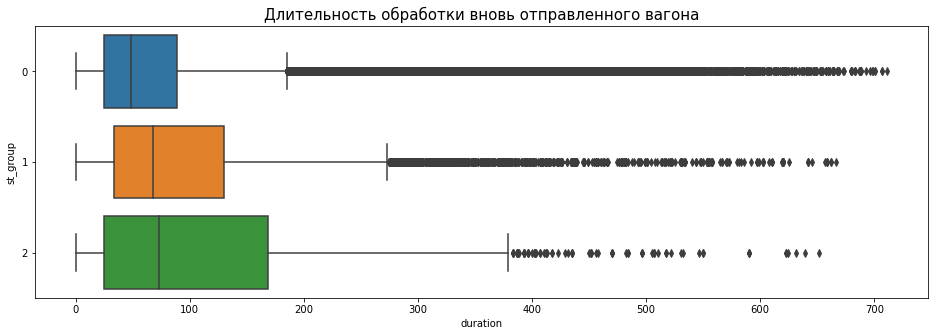

In [16]:
plt.figure(figsize = (16,5))
sns.boxplot(x= 'duration', y = 'st_group', data=data, orient='h')
plt.title('Длительность обработки вновь отправленного вагона', fontsize=15)
plt.show();

In [17]:
data['unload_only'] = data['1Xduration'].apply(lambda x: 1 if x < 0.5 else 0)
data['load_only'] = data['2Xduration'].apply(lambda x: 1 if x < 0.5 else 0 )
data.head()

,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,st_group,unload_only,load_only
0,830003,24579856,2020-07-28 17:12:00,2020-07-29 06:02:00,12.833333,0.000000,12.833333,1,0,1
1,830003,24579856,2020-07-26 18:38:00,2020-07-27 21:47:00,27.150000,0.000000,27.150000,1,0,1
2,830003,24622276,2020-07-15 23:32:00,2020-07-17 04:27:00,15.200000,13.716667,28.916667,1,0,0
3,830003,28034288,2020-07-25 00:21:00,2020-07-28 05:40:00,16.766667,60.550000,77.316667,1,0,0
4,830003,29019288,2020-07-24 20:51:00,2020-07-28 02:00:00,77.150000,0.000000,77.150000,1,0,1


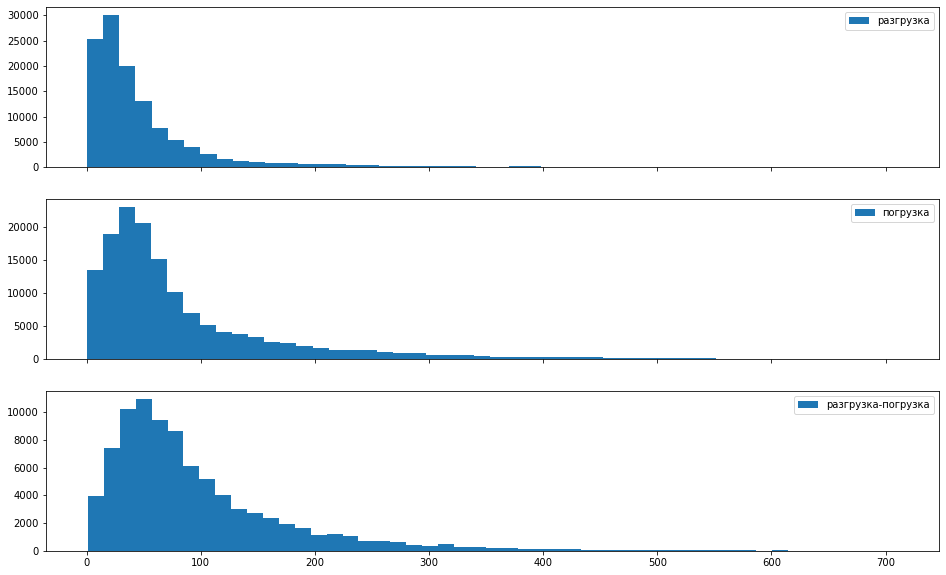

In [18]:
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('длительность по типам')
axs[0].hist(data.query('unload_only==1').duration,bins=50,histtype='stepfilled',label='разгрузка')
axs[0].legend(loc='best')
axs[1].hist(data.query('load_only==1').duration,bins=50,histtype='stepfilled',label='погрузка')
axs[1].legend(loc='best');
# plt.hist(data_uo.query('operation_st_esr==954102').duration,bins=50,histtype='stepfilled',label='small 0')
axs[2].hist(data.query('unload_only==0 & load_only==0').duration,bins=50,histtype='stepfilled',label='разгрузка-погрузка')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

Text(0.5, 0, 'Длительность операций в часах')

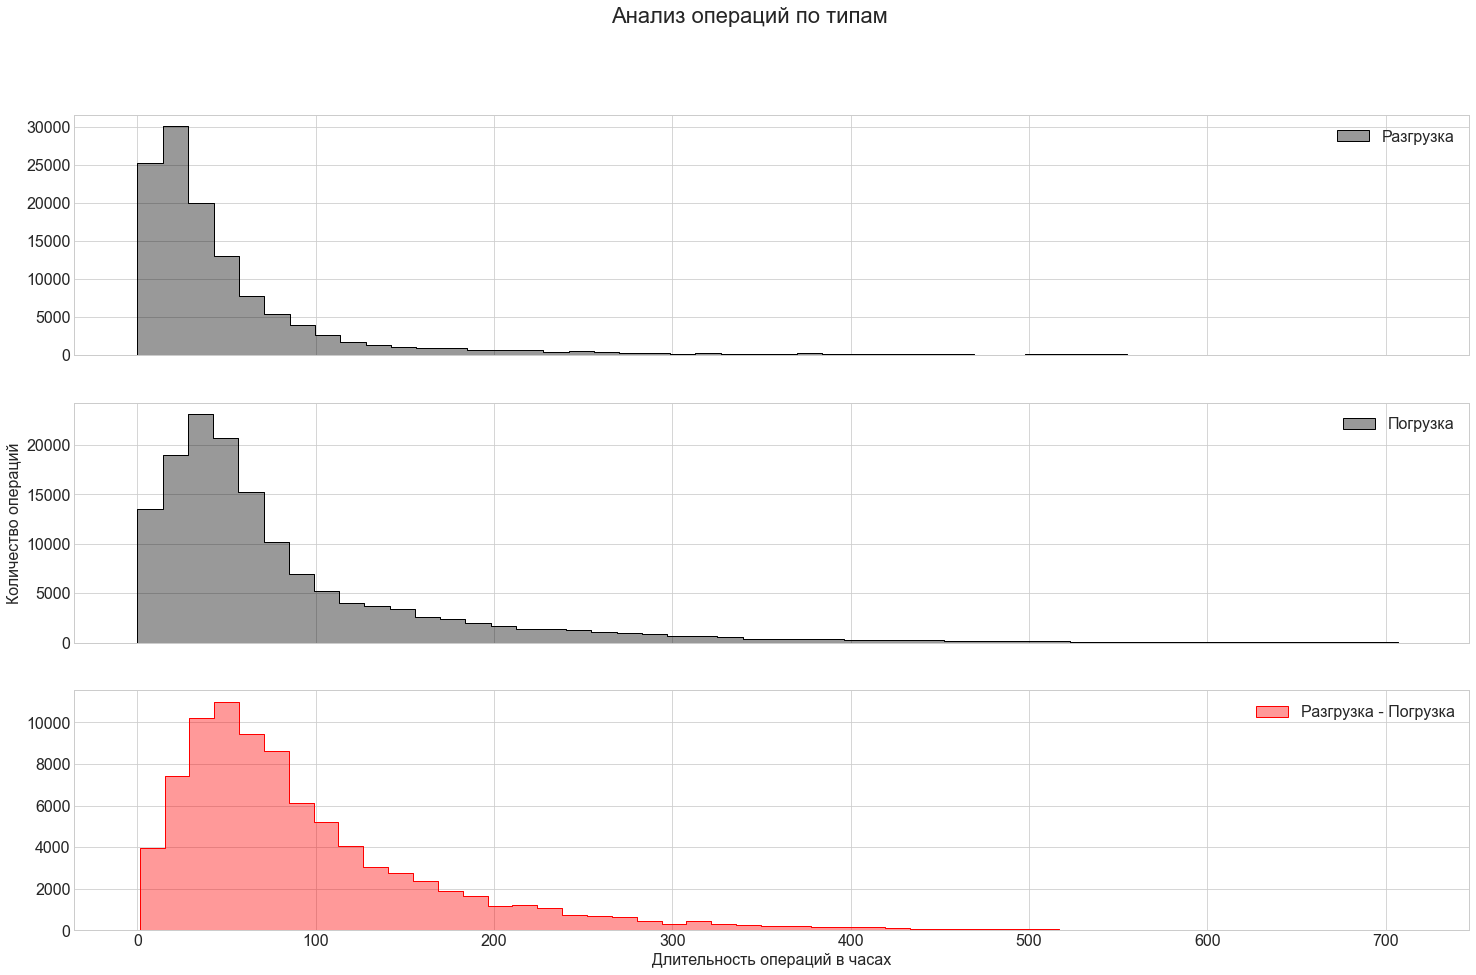

In [72]:
fig, axes = plt.subplots(3,1, sharex=True)
fig.suptitle('Анализ операций по типам')
#plt.subtitle('Vertically stacked subplots')
# hist1
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.histplot(data.query('unload_only==1').duration, ax=axes[0], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[0].set_title('Histplot of cargo 943803'.format())
axes[0].legend(["Разгрузка"])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# hist2
sns.histplot(data.query('load_only==1').duration, ax=axes[1], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
axes[1].legend(["Погрузка"])
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество операций')
# hist3
sns.histplot(data.query('unload_only==0 & load_only==0').duration, ax=axes[2], 
                                bins=50, element="step", color='r', alpha=0.4)
#axes[2].set_title('Histplot of cargo 946801'.format())
axes[2].legend(["Разгрузка - Погрузка"])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.xlabel("Длительность операций в часах")
#axes[0].set_fc('k')


In [19]:
data.query('unload_only==1').size

1187970

In [20]:
data.query('load_only==1').size

1458720

In [21]:
data.query('unload_only==0 & load_only==0').size

865190

In [22]:
data_uo = data.loc[ data['unload_only']==1]
print(data_uo.size)
data_uo.head()

1187970


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,st_group,unload_only,load_only
8,830003,29951290,2020-07-22 00:15:00,2020-07-25 03:30:00,0.0,75.25,75.25,1,1,0
109,830003,58980400,2020-07-22 01:33:00,2020-07-25 03:00:00,0.0,73.45,73.45,1,1,0
116,830003,59685180,2020-07-21 23:39:00,2020-07-25 03:00:00,0.0,75.35,75.35,1,1,0
180,830107,52353976,2020-07-18 23:36:00,2020-07-24 23:30:00,0.0,143.90,143.90,0,1,0
181,830107,52360583,2020-07-18 23:36:00,2020-07-24 23:30:00,0.0,143.90,143.90,0,1,0


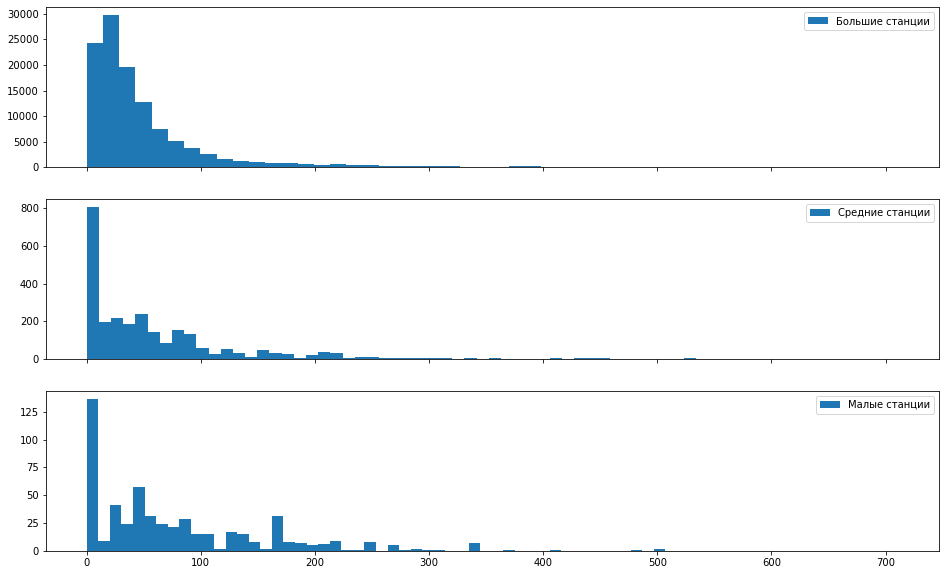

In [23]:
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции освобождения вагонов')
axs[0].hist(data_uo.query('st_group==0').duration,bins=50,histtype='stepfilled',label='Большие станции')
axs[0].legend(loc='best')
axs[1].hist(data_uo.query('st_group==1').duration,bins=50,histtype='stepfilled',label='Средние станции')
axs[1].legend(loc='best');
axs[2].hist(data_uo.query('st_group==2').duration,bins=50,histtype='stepfilled',label='Малые станции')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

Text(0.5, 0, 'Длительность операций в часах')

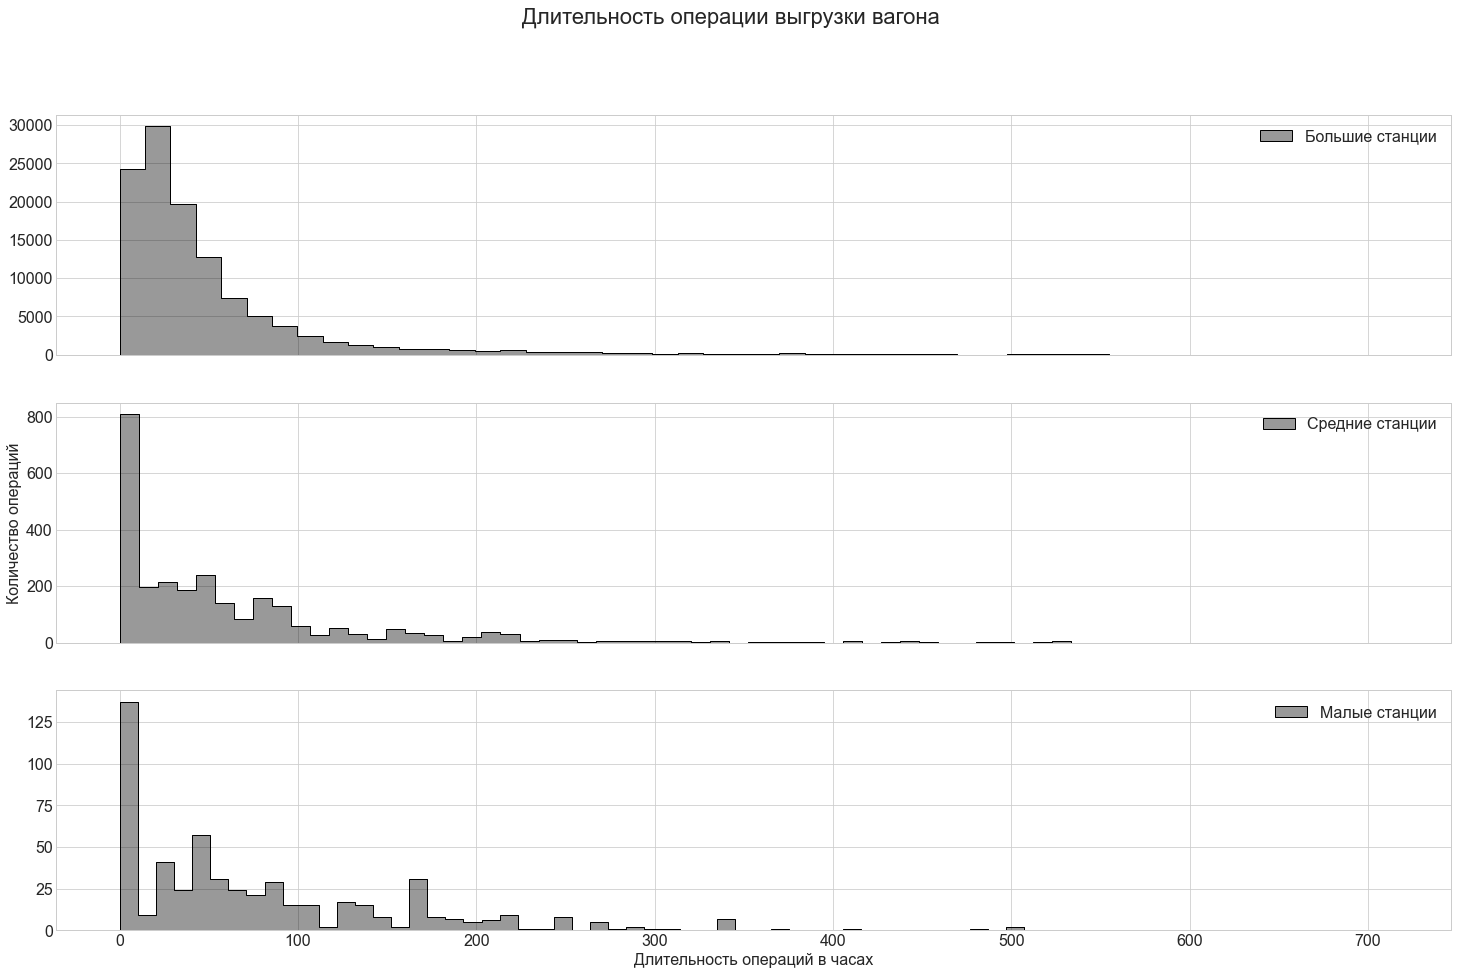

In [74]:
fig, axes = plt.subplots(3,1, sharex=True)
fig.suptitle('Длительность операции выгрузки вагона')
#plt.subtitle('Vertically stacked subplots')
# hist1
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.histplot(data_uo.query('st_group==0').duration, ax=axes[0], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[0].set_title('Histplot of cargo 943803'.format())
axes[0].legend(["Большие станции"])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# hist2
sns.histplot(data_uo.query('st_group==1').duration, ax=axes[1], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
axes[1].legend(["Средние станции"])
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество операций')
# hist3
sns.histplot(data_uo.query('st_group==2').duration, ax=axes[2], 
                                bins=50, element="step", color='k', alpha=0.4)
#axes[2].set_title('Histplot of cargo 946801'.format())
axes[2].legend(["Малые станции"])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.xlabel("Длительность операций в часах")
#axes[0].set_fc('k')


In [24]:
data_lo = data.loc[ data['load_only']==1]
print(data_lo.size)
data_lo.head()

1458720


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,st_group,unload_only,load_only
0,830003,24579856,2020-07-28 17:12:00,2020-07-29 06:02:00,12.833333,0.0,12.833333,1,0,1
1,830003,24579856,2020-07-26 18:38:00,2020-07-27 21:47:00,27.150000,0.0,27.150000,1,0,1
4,830003,29019288,2020-07-24 20:51:00,2020-07-28 02:00:00,77.150000,0.0,77.150000,1,0,1
5,830003,29104163,2020-07-18 16:52:00,2020-07-25 11:48:00,162.933333,0.0,162.933333,1,0,1
7,830003,29108982,2020-07-27 10:56:00,2020-07-31 23:00:00,108.066667,0.0,108.066667,1,0,1


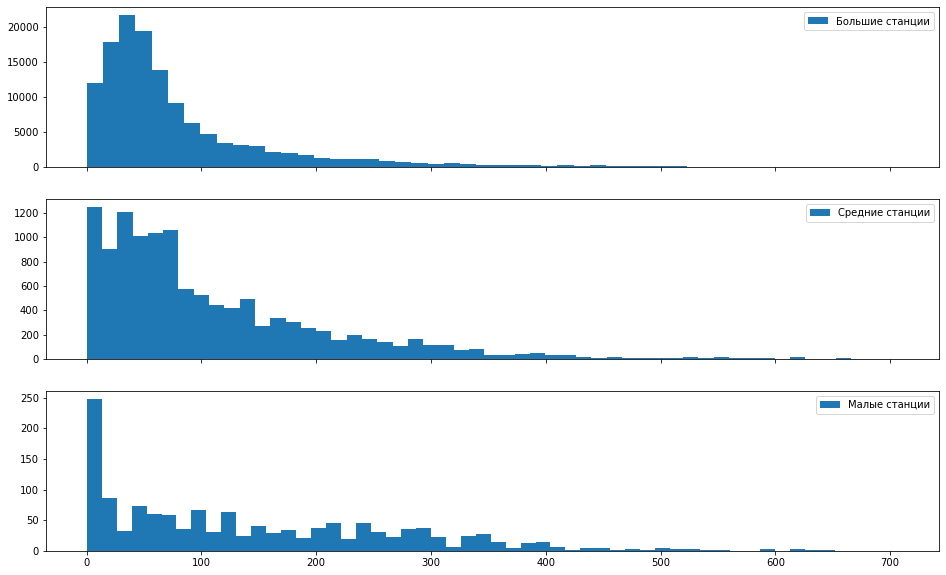

In [25]:
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции загрузки вагонов')
axs[0].hist(data_lo.query('st_group==0').duration,bins=50,histtype='stepfilled',label='Большие станции')
axs[0].legend(loc='best')
axs[1].hist(data_lo.query('st_group==1').duration,bins=50,histtype='stepfilled',label='Средние станции')
axs[1].legend(loc='best');
axs[2].hist(data_lo.query('st_group==2').duration,bins=50,histtype='stepfilled',label='Малые станции')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций загрузки вагона')

Text(0.5, 0, 'Длительность операций в часах')

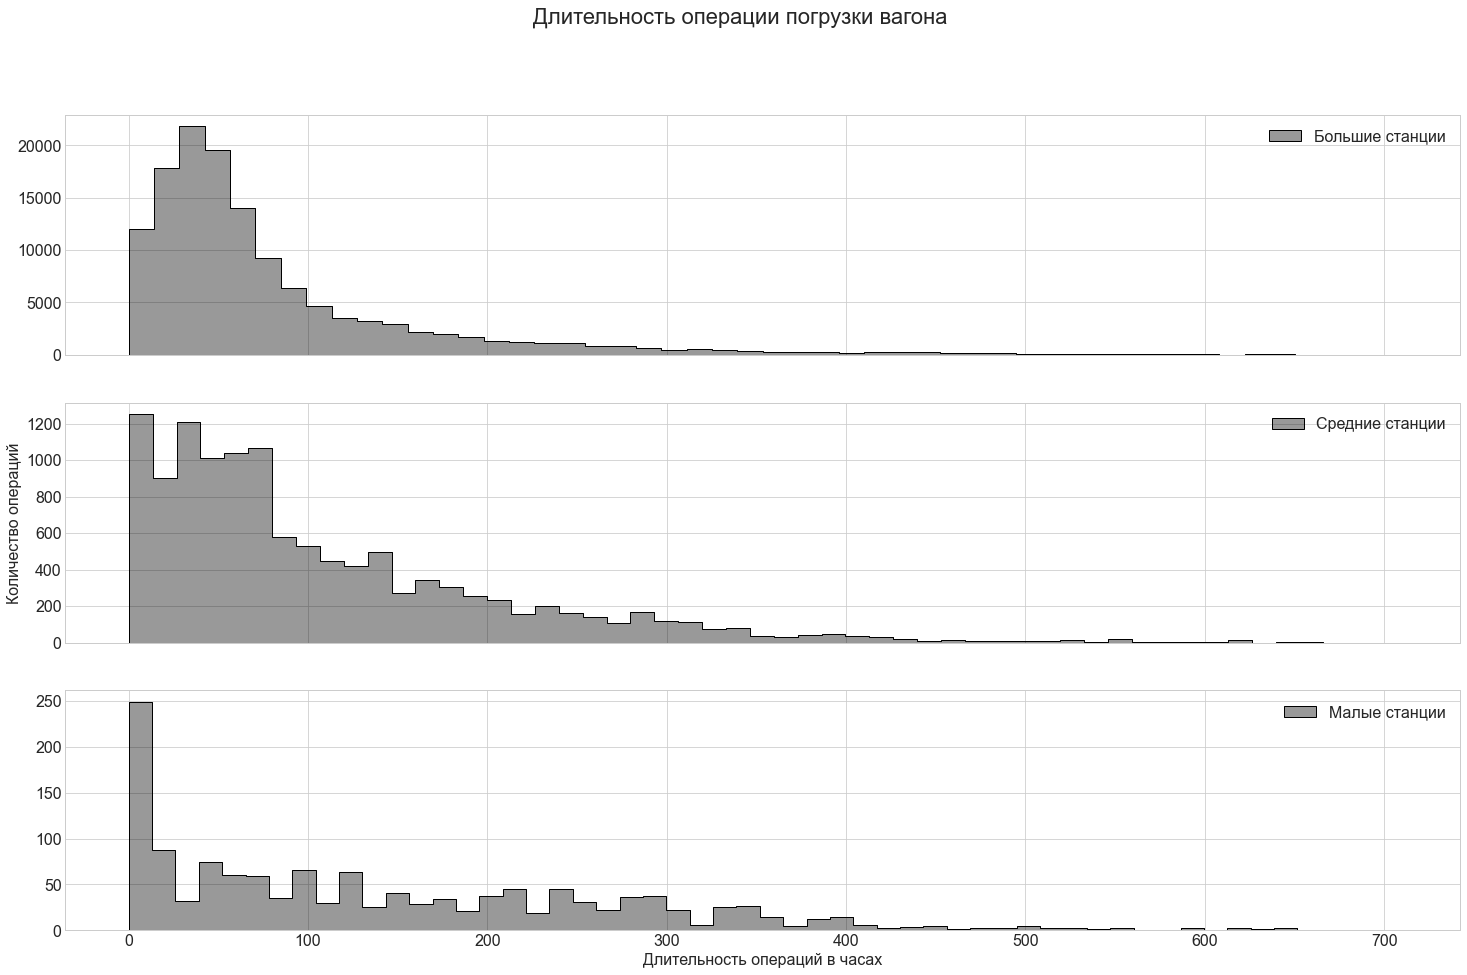

In [76]:
fig, axes = plt.subplots(3,1, sharex=True)
fig.suptitle('Длительность операции погрузки вагона')
#plt.subtitle('Vertically stacked subplots')
# hist1
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.histplot(data_lo.query('st_group==0').duration, ax=axes[0], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[0].set_title('Histplot of cargo 943803'.format())
axes[0].legend(["Большие станции"])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# hist2
sns.histplot(data_lo.query('st_group==1').duration, ax=axes[1], bins=50,
                                        element="step",  color='k', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
axes[1].legend(["Средние станции"])
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество операций')
# hist3
sns.histplot(data_lo.query('st_group==2').duration, ax=axes[2], 
                                bins=50, element="step", color='k', alpha=0.4)
#axes[2].set_title('Histplot of cargo 946801'.format())
axes[2].legend(["Малые станции"])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.xlabel("Длительность операций в часах")

In [26]:
data_1 = data.loc[ data['load_only']==0]
data_ul = data_1[data_1['unload_only']==0]
print(data_ul.size)
data_ul.head()

865190


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,st_group,unload_only,load_only
2,830003,24622276,2020-07-15 23:32:00,2020-07-17 04:27:00,15.200000,13.716667,28.916667,1,0,0
3,830003,28034288,2020-07-25 00:21:00,2020-07-28 05:40:00,16.766667,60.550000,77.316667,1,0,0
6,830003,29106739,2020-07-16 09:15:00,2020-07-19 01:43:00,11.800000,52.666667,64.466667,1,0,0
54,830003,52210242,2020-07-26 12:10:00,2020-07-30 04:10:00,14.800000,73.200000,88.000000,1,0,0
60,830003,52965357,2020-07-28 21:32:00,2020-07-29 22:18:00,7.483333,17.283333,24.766667,1,0,0


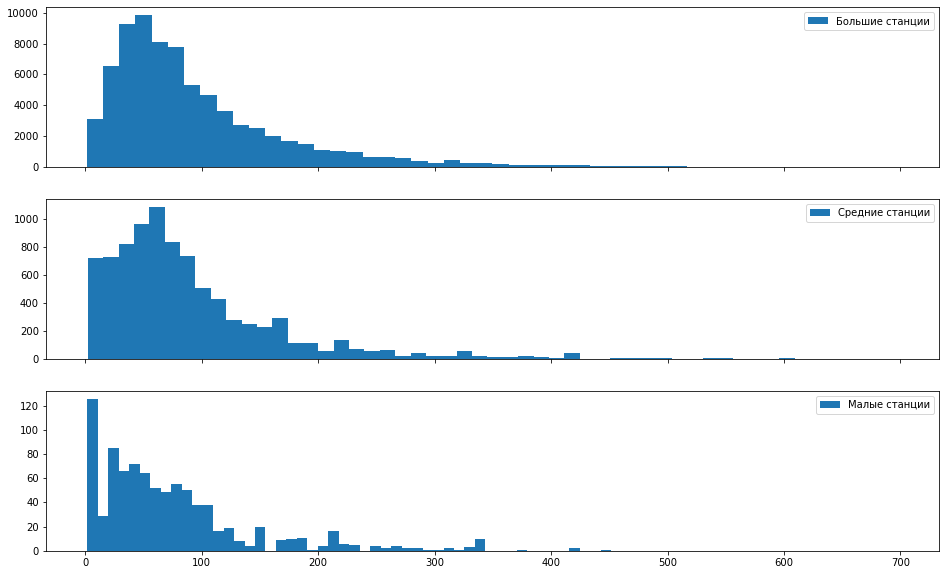

In [27]:
fig, axs = plt.subplots(3, sharex=True) 
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции загрузки вагонов')
axs[0].hist(data_ul.query('st_group==0').duration,bins=50,histtype='stepfilled',label='Большие станции')
axs[0].legend(loc='best')
axs[1].hist(data_ul.query('st_group==1').duration,bins=50,histtype='stepfilled',label='Средние станции')
axs[1].legend(loc='best');
axs[2].hist(data_ul.query('st_group==2').duration,bins=50,histtype='stepfilled',label='Малые станции')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций загрузки вагона')

Text(0.5, 0, 'Длительность операций в часах')

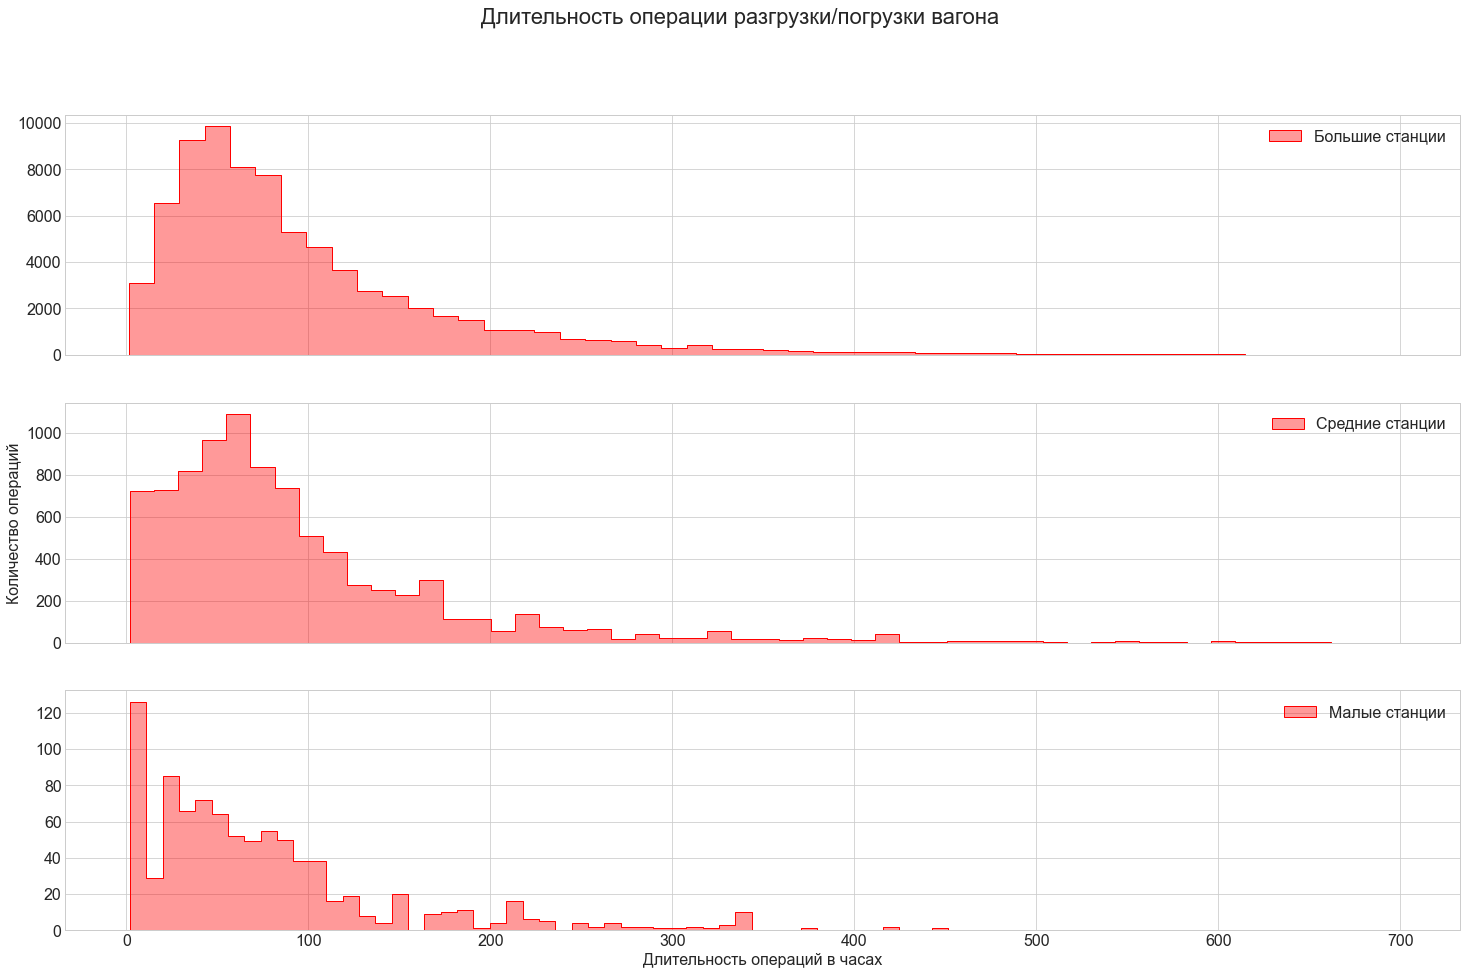

In [78]:
fig, axes = plt.subplots(3,1, sharex=True)
fig.suptitle('Длительность операции разгрузки/погрузки вагона')
#plt.subtitle('Vertically stacked subplots')
# hist1
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.histplot(data_ul.query('st_group==0').duration, ax=axes[0], bins=50,
                                        element="step",  color='r', alpha=0.4)
#axes[0].set_title('Histplot of cargo 943803'.format())
axes[0].legend(["Большие станции"])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# hist2
sns.histplot(data_ul.query('st_group==1').duration, ax=axes[1], bins=50,
                                        element="step",  color='r', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
axes[1].legend(["Средние станции"])
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество операций')
# hist3
sns.histplot(data_ul.query('st_group==2').duration, ax=axes[2], 
                                bins=50, element="step", color='r', alpha=0.4)
#axes[2].set_title('Histplot of cargo 946801'.format())
axes[2].legend(["Малые станции"])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.xlabel("Длительность операций в часах")

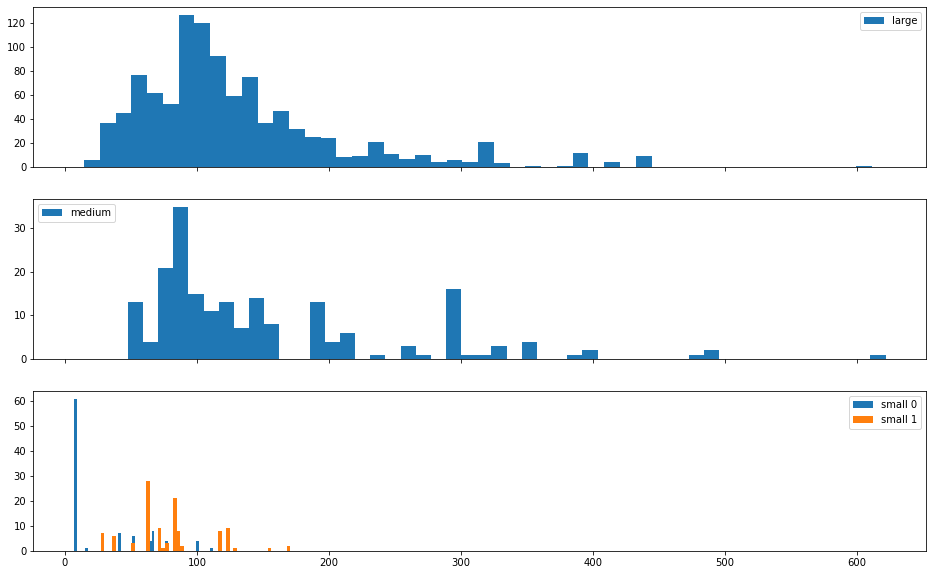

In [28]:
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции загрузки пустого вагонов')
axs[0].hist(data_ul.query('operation_st_esr==967600').duration,bins=50,histtype='stepfilled',label='large')
axs[0].legend(loc='best')
axs[1].hist(data_ul.query('operation_st_esr==946801').duration,bins=50,histtype='stepfilled',label='medium')
axs[1].legend(loc='best');
axs[2].hist(data_ul.query('operation_st_esr==954102').duration,bins=50,histtype='stepfilled',label='small 0')
axs[2].hist(data_ul.query('operation_st_esr==943803').duration,bins=50,histtype='stepfilled',label='small 1')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

Text(0.5, 0, 'Длительность циклов погрузки/разгрузки в часах')

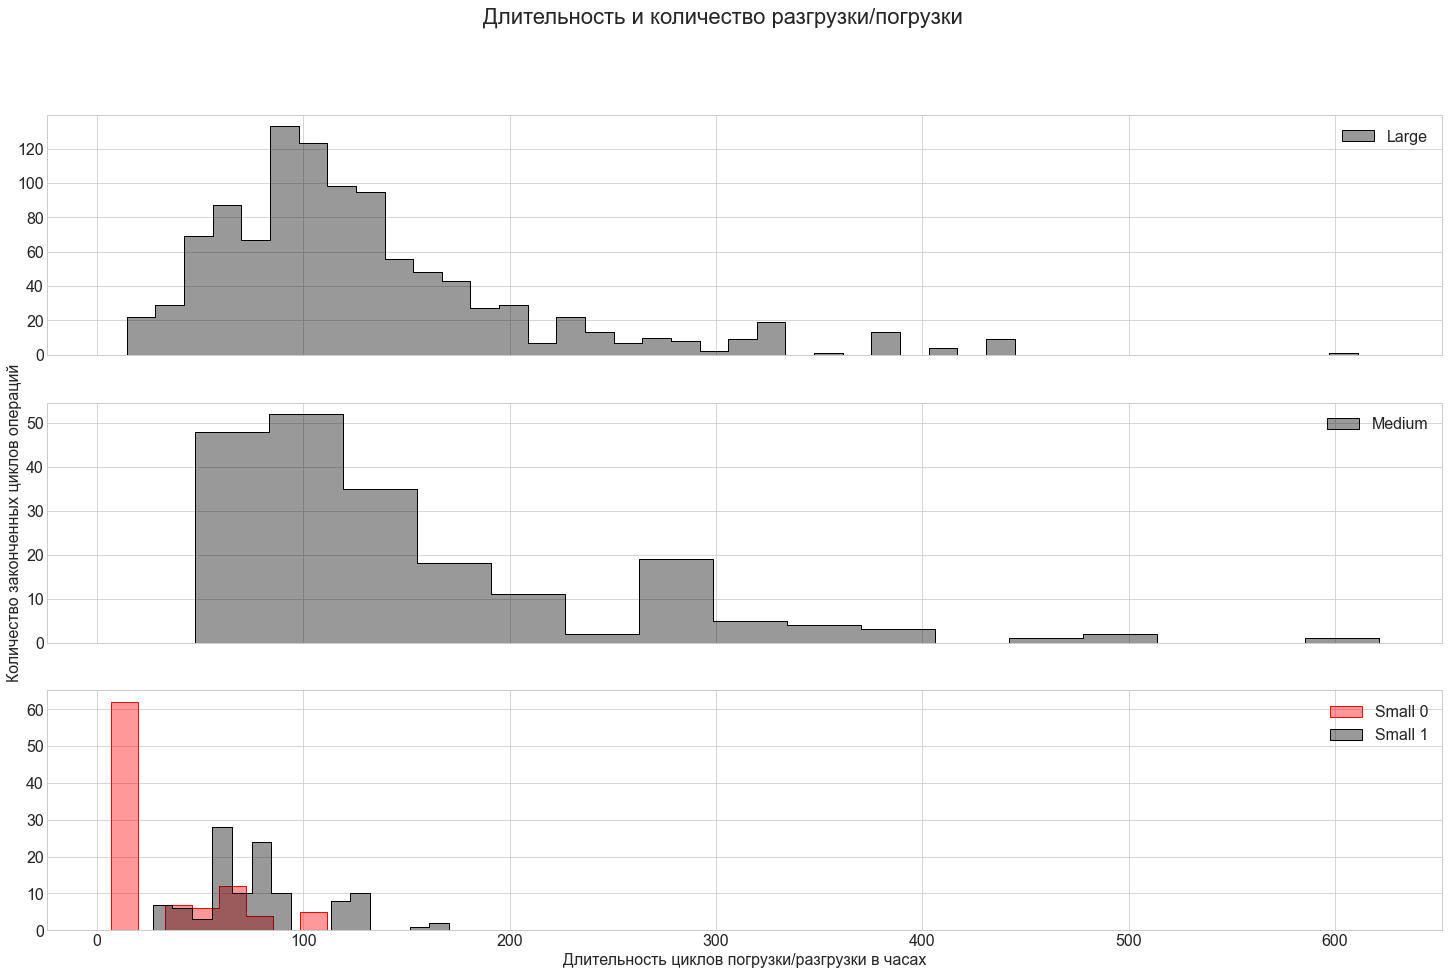

In [51]:
fig, axes = plt.subplots(3,1, sharex=True)
fig.suptitle('Длительность и количество разгрузки/погрузки')
#plt.subtitle('Vertically stacked subplots')
# hist1
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.histplot(data_ul.query('operation_st_esr==967600').duration, ax=axes[0], 
                                        element="step",  color='k', alpha=0.4)
#axes[0].set_title('Histplot of cargo 943803'.format())
axes[0].legend(["Large"])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# hist2
sns.histplot(data_ul.query('operation_st_esr==946801').duration, ax=axes[1], 
                                        element="step",  color='k', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
axes[1].legend(["Medium"])
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество законченных циклов операций')
# hist3
sns.histplot(data_ul.query('operation_st_esr==954102').duration, ax=axes[2], 
                                         element="step", color='r', alpha=0.4)
sns.histplot(data_ul.query('operation_st_esr==943803').duration, ax=axes[2], 
                                         element="step", color='k', alpha=0.4)
#axes[2].set_title('Histplot of cargo 946801'.format())
axes[2].legend(["Small 0", "Small 1"])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.xlabel("Длительность циклов погрузки/разгрузки в часах")
#axes[0].set_fc('k')


<AxesSubplot:xlabel='duration', ylabel='Count'>

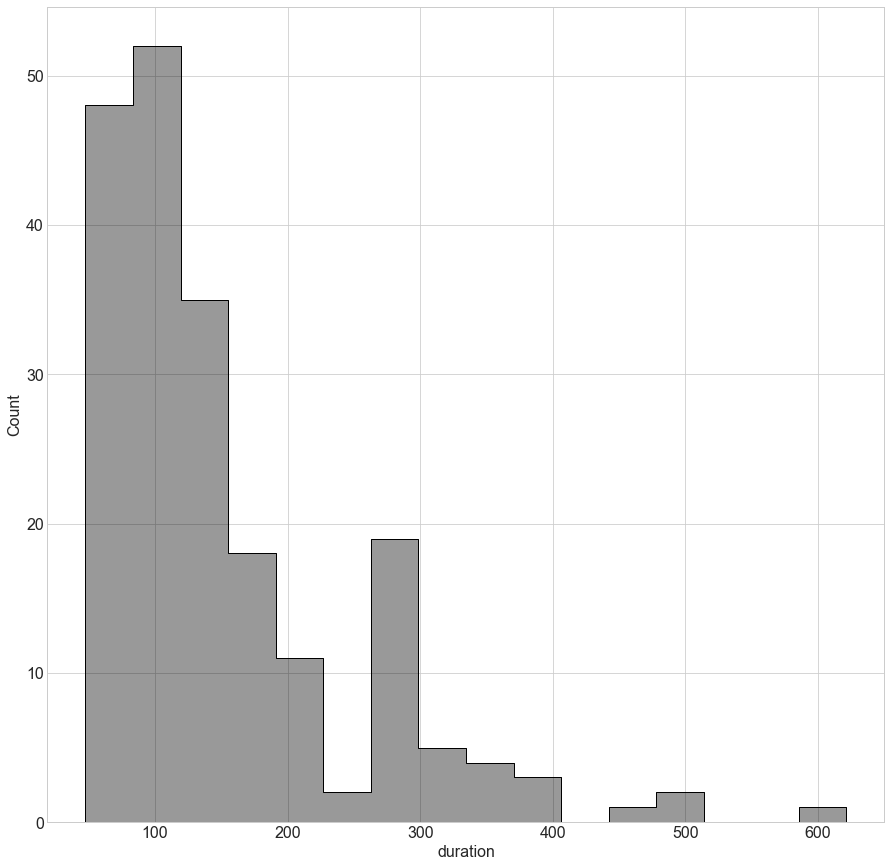

In [42]:
sns.histplot(data_ul.query('operation_st_esr==946801').duration, 
             element="step",  color='k', alpha=0.4)
#axes[1].set_title('Histplot of cargo 967600'.format())
#axes[1].legend(["Medium"])
#axes[1].set_xlabel('')
#axes[1].set_ylabel('Количество законченных циклов обменов грузом')